# (Re-)Imag(in)ing Price Trends


![image](https://papers.ssrn.com/sol3/journalcovers/665322_43521.gif)

We reconsider the idea of trend-based predictability using methods that flexibly learn price patterns that are most predictive of future returns, rather than testing hypothesized or pre-specified patterns (e.g., momentum and reversal). Our raw predictor data are images---stock-level price charts---from which we elicit the price patterns that best predict returns using machine learning image analysis methods. The predictive patterns we identify are largely distinct from trend signals commonly analyzed in the literature, give more accurate return predictions, translate into more profitable investment strategies, and are robust to a battery of specification variations. They also appear context-independent: Predictive patterns estimated at short time scales (e.g., daily data) give similarly strong predictions when applied at longer time scales (e.g., monthly), and patterns learned from US stocks predict equally well in international markets.

[Source](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3756587).



## Part 1: Data Processing

In [ ]:
import pandas as pd
import numpy as np
import os.path as op

IMAGE_WIDTH = {5: 15, 20: 60, 60: 180}
IMAGE_HEIGHT = {5: 32, 20: 64, 60: 96}

In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Packt Publisher/Author - Deep Learning for Computer Vision and Generative AI/notebooks/data')

In [ ]:
! unzip -q "stock_img_data.zip"

### Load `.dat` File

This code snippet is using NumPy, a popular Python library for numerical computing, to create a memory-mapped array from a binary file. The use of a memory-mapped file allows data to be read and written directly from disk, which is useful for working with large datasets that do not fit into memory. Here's a breakdown of what each part of the code does:

1. **`year = 2013`**: This line sets the variable `year` to 2013. This variable is used later in the path to the file.

2. **`np.memmap(...)`**: This is the function call that creates a memory-mapped array. The `memmap` function is part of NumPy and is used here to map a binary file on disk into a NumPy array for efficient reading and writing.

3. **`op.join(...)`**: This is presumably a call to `os.path.join(...)`, a function that concatenates its arguments to form a file path that's compatible with the operating system. In this case, it's used to create the path to the binary file. The `op` is likely a shorthand for `os.path` used in this code snippet. The path constructed is `"./monthly_20d/20d_month_has_vb_[20]_ma_2013_images.dat"`, assuming `op` is indeed `os.path`. This path includes the `year` variable to point to a specific file for the year 2013.

4. **`dtype=np.uint8`**: This specifies the data type of the array elements. `np.uint8` is an 8-bit unsigned integer, which means each number in the array can represent a value from 0 to 255. This is a common choice for image data, where each pixel's intensity is typically represented in this range.

5. **`mode='r'`**: This mode indicates that the memory-mapped file is opened in read-only mode. You won't be able to modify the contents of the array.

6. **`.reshape((-1, IMAGE_HEIGHT[20], IMAGE_WIDTH[20]))`**: This reshapes the memory-mapped array into a specific shape. The shape is determined by three dimensions: the first dimension `-1` is a placeholder that tells NumPy to automatically calculate the size of this dimension based on the size of the data and the other dimensions. `IMAGE_HEIGHT[20]` and `IMAGE_WIDTH[20]` are used as the height and width of the images, respectively. This suggests that the binary file contains image data, where each image has a height of `IMAGE_HEIGHT[20]` pixels and a width of `IMAGE_WIDTH[20]` pixels. The use of `20` here and in the file name suggests that this is specifically tailored for a dataset or a set of images identified by the number `20`.

In summary, this code snippet opens a binary file that contains image data for the year 2013, maps it into memory as a NumPy array for efficient access, and reshapes it into a 3D array where each 2D slice along the first dimension represents an individual image of predetermined height and width. This is a common pattern for handling large datasets of images in machine learning and data processing tasks.

In [ ]:
year = 2013
images = np.memmap(
    op.join(
        "./monthly_20d",
        f"20d_month_has_vb_[20]_ma_{year}_images.dat"),
    dtype=np.uint8, mode='r').reshape((-1, IMAGE_HEIGHT[20], IMAGE_WIDTH[20]))

(65486, 64, 60)


memmap([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0, 255,   0, ...,   0,   0,   0],
        [  0, 255,   0, ...,   0, 255,   0],
        [  0, 255,   0, ...,   0, 255,   0]], dtype=uint8)
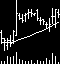

In [ ]:
print(images.shape)
images[0]

### Load `.feather` File

In [ ]:
label_df = pd.read_feather(op.join("./monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))
label_df.head()

,Date,StockID,MarketCap,Ret_5d,Ret_20d,Ret_60d,Ret_month,EWMA_vol
0,2013-01-31,10001,80509.593750,0.013172,0.016743,0.054595,0.011654,0.000178
1,2013-02-28,10001,81080.578125,0.011066,0.030728,0.090775,0.030728,0.000102
2,2013-03-28,10001,83201.398438,0.008825,0.014323,0.005225,0.017276,0.000048
3,2013-04-30,10001,86668.703125,0.008714,0.022298,0.011196,-0.000550,0.000079
4,2013-05-31,10001,86249.203125,0.032101,0.006282,0.017159,0.006282,0.000082


### Data Visualization

0


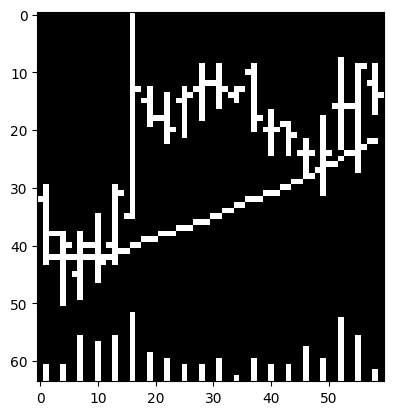

1


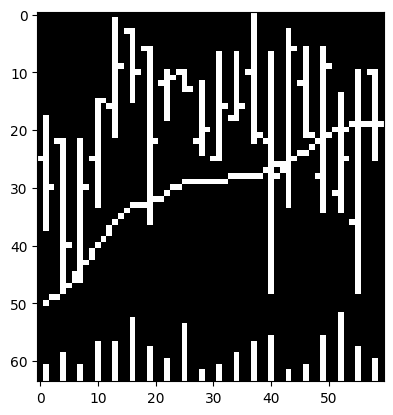

2


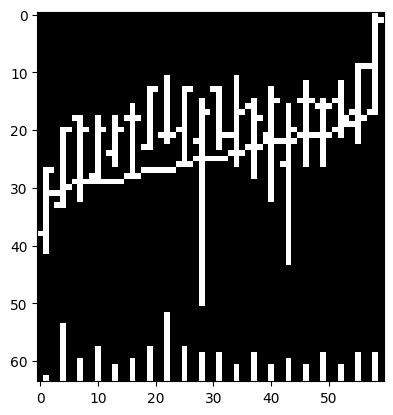

3


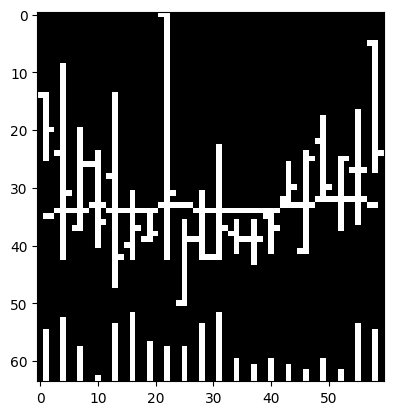

4


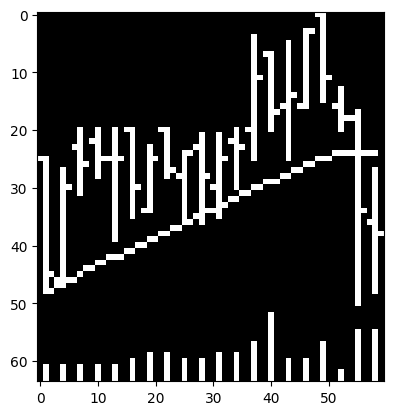

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(label_df.loc[i, 'Ret_5d'])
    plt.axis('off')

plt.show()

In [ ]:
images.shape, label_df.shape

((65486, 64, 60), (65486, 8))

In [ ]:
import pickle

In [ ]:
os.listdir()

['leapGestRecog.zip',
 'leapGestRecog',
 'leapgestrecog',
 'hand_gesture.pkl',
 'famous_physicists.jpg',
 'stock_img_data.zip',
 'monthly_20d',
 '__MACOSX',
 'label_columns.txt',
 '20d_month_has_vb_[20]_ma_2017_images.pkl',
 '20d_month_has_vb_[20]_ma_2018_images.pkl',
 '20d_month_has_vb_[20]_ma_2019_images.pkl',
 '20d_month_has_vb_[20]_ma_2016_images.pkl',
 '20d_month_has_vb_[20]_ma_2015_images.pkl',
 '20d_month_has_vb_[20]_ma_2014_images.pkl']

In [ ]:
this_file_name = f"20d_month_has_vb_[20]_ma_{year}_images.pkl"
print(this_file_name)

20d_month_has_vb_[20]_ma_2013_images.pkl


In [ ]:
%%time

a = images, label_df
with open(this_file_name, 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

CPU times: user 76.5 ms, sys: 467 ms, total: 544 ms
Wall time: 2.11 s


In [ ]:
"/content/drive/MyDrive/Packt Publisher/Author - Deep Learning for Computer Vision and Generative AI/notebooks/data/20d_month_has_vb_[20]_ma_2019_images.pkl"

In [ ]:
with open('20d_month_has_vb_[20]_ma_2019_images.pkl', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
images, label_df = b

In [ ]:
year = 2013
for year in range(1993, 2013):
    images = np.memmap(
        op.join(
            "./monthly_20d",
            f"20d_month_has_vb_[20]_ma_{year}_images.dat"),
        dtype=np.uint8, mode='r').reshape((-1, IMAGE_HEIGHT[20], IMAGE_WIDTH[20]))

    label_df = pd.read_feather(op.join("./monthly_20d", f"20d_month_has_vb_[20]_ma_{year}_labels_w_delay.feather"))
    label_df.head()

    this_file_name = f"20d_month_has_vb_[20]_ma_{year}_images.pkl"
    print(this_file_name)

    a = images, label_df
    with open(this_file_name, 'wb') as handle:
        pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

20d_month_has_vb_[20]_ma_1993_images.pkl
20d_month_has_vb_[20]_ma_1994_images.pkl
20d_month_has_vb_[20]_ma_1995_images.pkl
20d_month_has_vb_[20]_ma_1996_images.pkl
20d_month_has_vb_[20]_ma_1997_images.pkl
20d_month_has_vb_[20]_ma_1998_images.pkl
20d_month_has_vb_[20]_ma_1999_images.pkl
20d_month_has_vb_[20]_ma_2000_images.pkl
20d_month_has_vb_[20]_ma_2001_images.pkl
20d_month_has_vb_[20]_ma_2002_images.pkl
20d_month_has_vb_[20]_ma_2003_images.pkl
20d_month_has_vb_[20]_ma_2004_images.pkl
20d_month_has_vb_[20]_ma_2005_images.pkl
20d_month_has_vb_[20]_ma_2006_images.pkl
20d_month_has_vb_[20]_ma_2007_images.pkl
20d_month_has_vb_[20]_ma_2008_images.pkl
20d_month_has_vb_[20]_ma_2009_images.pkl
20d_month_has_vb_[20]_ma_2010_images.pkl
20d_month_has_vb_[20]_ma_2011_images.pkl
20d_month_has_vb_[20]_ma_2012_images.pkl


## Part 2: Training

In [ ]:
import pandas as pd
import numpy as np
import os.path as op

IMAGE_WIDTH = {5: 15, 20: 60, 60: 180}
IMAGE_HEIGHT = {5: 32, 20: 64, 60: 96}

import os

os.chdir('/content/drive/MyDrive/Packt Publisher/Author - Deep Learning for Computer Vision and Generative AI/notebooks/data')

import pickle

with open('20d_month_has_vb_[20]_ma_2019_images.pkl', 'rb') as handle:
    b = pickle.load(handle)

images, label_df = b

In [ ]:
images.shape, label_df.shape

((68637, 64, 60), (68637, 8))

In [ ]:
images = np.asarray(images)

### Get Data Ready

In [ ]:
X = np.asarray(images).reshape((images.shape[0], images.shape[1], images.shape[2], 1))
Y1 = label_df['Ret_5d'] > 0
Y2 = label_df['Ret_20d'] > 0
Y3 = label_df['Ret_60d'] > 0

In [ ]:
X.shape, Y1.shape, Y2.shape, Y3.shape

((68637, 64, 60, 1), (68637,), (68637,), (68637,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((54909, 64, 60, 1), (13728, 64, 60, 1), (54909,), (13728,))

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.7 MB/s eta 0:00:00


### Define `vit` Model

The code defines a Python class `CustomViT` that represents a customizable implementation of a Vision Transformer (ViT) model for image classification tasks. Vision Transformers apply the transformer architecture, typically used in natural language processing, to image data. The code is structured to allow flexibility in defining the model's parameters and includes methods for constructing the model, training it, and evaluating its performance. Here's an overview of its components:

### Class Initialization (`__init__`)
The `__init__` method initializes a new instance of the `CustomViT` class with various parameters that define the model's architecture and training configuration. These parameters include the number of classes (`num_classes`), input image shape (`input_shape`), learning rate, weight decay, batch size, number of training epochs, image size, patch size, dimensions of the projection layer, number of attention heads (`num_heads`), units in the transformer and MLP (multi-layer perceptron) layers, and the number of layers in the transformer.

It also computes the number of patches an image will be divided into based on the image size and patch size, and defines a data augmentation pipeline using Keras's Sequential API. This pipeline includes normalization, resizing, random flipping, rotation, and zooming to augment the training data and potentially improve model generalization.

### Multi-layer Perceptron (MLP) Method
The `mlp` method defines a simple MLP architecture used within the transformer. It takes a tensor `x` and a list of hidden units, applying a dense layer followed by a dropout for each unit in the list.

### Patches Class
The `Patches` inner class defines a custom Keras layer that extracts patches from the input images. This is a key part of adapting the transformer model to work with images, where the image is divided into a grid of smaller images (patches), which are then flattened and processed by the transformer.

### PatchEncoder Class
The `PatchEncoder` inner class also defines a custom Keras layer. It projects the flattened patches to a higher-dimensional space (using a dense layer) and adds position embeddings, allowing the model to take into account the position of each patch in the image.

### Creating the Vision Transformer Classifier
The `create_vit_classifier` method constructs the ViT model. It starts with the input layer, applies data augmentation, extracts and encodes patches, and then passes them through a series of transformer layers. Each transformer layer includes layer normalization, multi-head attention, and a residual connection, followed by another layer normalization and an MLP block with a residual connection. The output of the transformer layers is then processed through a final MLP head to produce the logits for classification.

### Experiment Runner
The `run_experiment` method compiles the model using an AdamW optimizer (with specified learning rate and weight decay), sets up a model checkpointing system, and trains the model on the provided training data (`x_train`, `y_train`) while validating on a split of this data. After training, it evaluates the model on a test set (`x_test`, `y_test`) and prints the accuracy and top-5 accuracy.

Overall, this class encapsulates the entire process of building, training, and evaluating a Vision Transformer model for image classification, offering flexibility through various parameters and a structured way to experiment with different configurations.

### Additional Features and Flexibility

The `CustomViT` class demonstrates an approach to implementing complex models like the Vision Transformer in a flexible and modular way. Here are some additional insights and potential enhancements to this implementation:

- **Modularity**: The class is designed to separate concerns, with distinct components responsible for data preprocessing, patch extraction, patch encoding, transformer construction, and model compilation and training. This makes the code easier to read, maintain, and extend. For example, if you want to experiment with different types of data augmentation, you can simply modify the `data_augmentation` attribute.

- **Customizability**: Through its initialization parameters, the class allows for easy adjustments to the model's architecture (e.g., the size and number of patches, the dimensions of the projection layer, the depth of the transformer, and the size of the MLP head). This makes it straightforward to experiment with different configurations to find the best setup for a particular dataset.

- **Advanced Transformer Features**: The implementation of the transformer block includes key components like multi-head attention and layer normalization, which are crucial for the transformer's ability to model complex relationships in data. The use of residual connections (add layers) helps in avoiding the vanishing gradient problem by allowing gradients to flow through the network more effectively.

- **Training and Evaluation**: The `run_experiment` method encapsulates the entire process of training and evaluating the model, including the use of callbacks for checkpointing (saving the best model based on validation accuracy) and the evaluation of test accuracy and top-5 accuracy. This method showcases a typical training loop for deep learning models, with flexibility for further customization, such as adding additional callbacks for learning rate scheduling or early stopping.

### Potential Enhancements

While the provided `CustomViT` class is a comprehensive implementation, there's always room for enhancements and customization based on specific needs:

- **Hyperparameter Tuning**: Integrating automated hyperparameter tuning tools (e.g., Keras Tuner or Optuna) could streamline the process of finding the optimal model configuration, improving performance without manually adjusting parameters.

- **Regularization Techniques**: Experimenting with different regularization techniques, such as varying dropout rates or incorporating label smoothing, could further improve model generalization and robustness.

- **Experiment Tracking**: Integrating experiment tracking tools like MLflow, Weights & Biases, or TensorBoard could provide better insights into model performance, training dynamics, and hyperparameter effects, facilitating more informed decision-making.

- **Advanced Data Augmentation**: Exploring more sophisticated data augmentation techniques or libraries (e.g., Albumentations) could uncover further performance improvements by enhancing model robustness to a wider variety of input data transformations.

- **Expand Dataset Support**: Extending the class to easily handle different types of datasets or incorporating techniques for dealing with imbalanced datasets could make the model more versatile and effective across diverse tasks.

In summary, the `CustomViT` class is a solid foundation for experimenting with Vision Transformers, offering both a deep dive into the architecture's components and a template for further exploration and optimization in the rapidly evolving field of computer vision.

In [ ]:
from typing import Any, Dict, List

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
class CustomViT:
    def __init__(
        self,
        num_classes: int = 2,
        input_shape: tuple = (299, 299, 3),
        learning_rate: float = 0.001,
        weight_decay: float = 0.0001,
        batch_size: int = 256,
        num_epochs: int = 800,
        image_size: int = 72,
        patch_size: int = 6,
        projection_dim: int = 64,
        num_heads: int = 4,
        transformer_units: List[int] = [128, 64],
        transformer_layers: int = 10,
        mlp_head_units: List[int] = [2048, 1024],
    ):
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.learning_rate = learning_rate
        self.weight_decay = weight_decay
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.image_size = image_size
        self.patch_size = patch_size
        self.projection_dim = projection_dim
        self.num_heads = num_heads
        self.transformer_units = transformer_units
        self.transformer_layers = transformer_layers
        self.mlp_head_units = mlp_head_units
        self.num_patches = (image_size // patch_size) ** 2
        self.data_augmentation = keras.Sequential(
            [
                layers.Normalization(),
                layers.Resizing(image_size, image_size),
                layers.RandomFlip("horizontal"),
                layers.RandomRotation(factor=0.02),
                layers.RandomZoom(height_factor=0.2, width_factor=0.2),
            ],
            name="data_augmentation",
        )

    def mlp(
        self, x: tf.Tensor, hidden_units: List[int], dropout_rate: float
    ) -> tf.Tensor:
        for units in hidden_units:
            x = layers.Dense(units, activation=tf.nn.gelu)(x)
            x = layers.Dropout(dropout_rate)(x)
        return x

    class Patches(layers.Layer):
        def __init__(self, patch_size: int):
            super().__init__()
            self.patch_size = patch_size

        def call(self, images: tf.Tensor) -> tf.Tensor:
            batch_size = tf.shape(images)[0]
            patches = tf.image.extract_patches(
                images=images,
                sizes=[1, self.patch_size, self.patch_size, 1],
                strides=[1, self.patch_size, self.patch_size, 1],
                rates=[1, 1, 1, 1],
                padding="VALID",
            )
            patch_dims = patches.shape[-1]
            patches = tf.reshape(patches, [batch_size, -1, patch_dims])
            return patches

    class PatchEncoder(layers.Layer):
        def __init__(self, num_patches: int, projection_dim: int):
            super().__init__()
            self.num_patches = num_patches
            self.projection = layers.Dense(units=projection_dim)
            self.position_embedding = layers.Embedding(
                input_dim=num_patches, output_dim=projection_dim
            )

        def call(self, patch):
            positions = tf.range(start=0, limit=self.num_patches, delta=1)
            encoded = self.projection(patch) + self.position_embedding(positions)
            return encoded

    def create_vit_classifier(self) -> keras.Model:
        inputs = layers.Input(shape=self.input_shape)
        augmented = self.data_augmentation(inputs)
        patches = self.Patches(self.patch_size)(augmented)
        encoded_patches = self.PatchEncoder(self.num_patches, self.projection_dim)(
            patches
        )

        for _ in range(self.transformer_layers):
            x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
            attention_output = layers.MultiHeadAttention(
                num_heads=self.num_heads, key_dim=self.projection_dim, dropout=0.1
            )(x1, x1)
            x2 = layers.Add()([attention_output, encoded_patches])
            x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
            x3 = self.mlp(x3, hidden_units=self.transformer_units, dropout_rate=0.1)
            encoded_patches = layers.Add()([x3, x2])

        representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        representation = layers.Flatten()(representation)
        representation = layers.Dropout(0.5)(representation)
        features = self.mlp(
            representation, hidden_units=self.mlp_head_units, dropout_rate=0.5
        )
        logits = layers.Dense(self.num_classes)(features)
        model = keras.Model(inputs=inputs, outputs=logits)
        return model

    def run_experiment(
        self, model: keras.Model, x_train, y_train, x_test, y_test
    ) -> Dict[str, Any]:
        optimizer = tfa.optimizers.AdamW(
            learning_rate=self.learning_rate, weight_decay=self.weight_decay
        )

        model.compile(
            optimizer=optimizer,
            loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=[
                keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
            ],
        )

        checkpoint_filepath = "/tmp/checkpoint"
        checkpoint_callback = keras.callbacks.ModelCheckpoint(
            checkpoint_filepath,
            monitor="val_accuracy",
            save_best_only=True,
            save_weights_only=True,
        )

        history = model.fit(
            x=x_train,
            y=y_train,
            batch_size=self.batch_size,
            epochs=self.num_epochs,
            validation_split=0.1,
            callbacks=[checkpoint_callback],
        )

        model.load_weights(checkpoint_filepath)
        _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
        print(f"Test accuracy: {accuracy * 100:.2f}%")
        print(f"Test top 5 accuracy: {top_5_accuracy * 100:.2f}%")

        return history

    # Additional methods like plot_patches can be added here following the same pattern

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

### Define Model and Train

In [ ]:
%%time

with tf.device('/device:GPU:0'):
    vit_classifier = CustomViT(input_shape=(64, 60, 1))
    model = vit_classifier.create_vit_classifier()
    history = vit_classifier.run_experiment(model, x_train, y_train, x_test, y_test)

Epoch 1/800
194/194 [==============================] - 100s 439ms/step - loss: 0.8947 - accuracy: 0.5077 - top-5-accuracy: 1.0000 - val_loss: 0.6924 - val_accuracy: 0.5281 - val_top-5-accuracy: 1.0000
Epoch 2/800
194/194 [==============================] - 86s 445ms/step - loss: 0.6952 - accuracy: 0.5162 - top-5-accuracy: 1.0000 - val_loss: 0.6911 - val_accuracy: 0.5218 - val_top-5-accuracy: 1.0000
Epoch 3/800
194/194 [==============================] - 90s 463ms/step - loss: 0.6917 - accuracy: 0.5265 - top-5-accuracy: 1.0000 - val_loss: 0.6878 - val_accuracy: 0.5416 - val_top-5-accuracy: 1.0000
Epoch 4/800
 59/194 [========>.....................] - ETA: 59s - loss: 0.6908 - accuracy: 0.5339 - top-5-accuracy: 1.0000 